# 지하철 역별 상권 분석

In [2]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH='C:/workplace/shop'

sp=pd.read_csv(PATH+'/서울시 우리마을가게 상권분석서비스(상권-생활인구).csv',encoding='cp949')
income_21=pd.read_csv(PATH+'/서울시 우리마을가게 상권분석서비스(상권-추정매출).csv',encoding='cp949')
where=pd.read_csv(PATH+'/서울시 우리마을가게 상권분석서비스(상권영역).csv',encoding='cp949')
gu_code=pd.read_csv(PATH+'/행정동코드_매핑정보_2018.csv')

## 생활인구

: 통신데이터로 특정 시점의 개인이 위차한 지역 인구(상주인구+직장인구)

In [3]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46263 entries, 0 to 46262
Columns: 532 entries, 기준 년코드 to 여성연령대_60_이상_일요일시간대_6_생활인구_수
dtypes: int64(529), object(3)
memory usage: 187.8+ MB


In [4]:
for i in sp.keys():
    print(i,'-->',type(sp[i][0]),sp[i][0])

기준 년코드 --> <class 'numpy.int64'> 2021
기준_분기_코드 --> <class 'numpy.int64'> 3
상권_구분_코드 --> <class 'str'> U
 상권_구분_코드_명 --> <class 'str'> 관광특구
상권_코드 --> <class 'numpy.int64'> 1001496
상권_코드_명 --> <class 'str'> 강남 마이스 관광특구
총_생활인구_수 --> <class 'numpy.int64'> 84144
남성_생활인구_수 --> <class 'numpy.int64'> 42839
여성_생활인구_수 --> <class 'numpy.int64'> 41306
연령대_10_생활인구_수 --> <class 'numpy.int64'> 5308
연령대_20_생활인구_수 --> <class 'numpy.int64'> 17883
연령대_30_생활인구_수 --> <class 'numpy.int64'> 23311
연령대_40_생활인구_수 --> <class 'numpy.int64'> 18730
연령대_50_생활인구_수 --> <class 'numpy.int64'> 10423
연령대_60_이상_생활인구_수 --> <class 'numpy.int64'> 8490
시간대_1_생활인구_수 --> <class 'numpy.int64'> 6223
시간대_2_생활인구_수 --> <class 'numpy.int64'> 17115
시간대_3_생활인구_수 --> <class 'numpy.int64'> 19093
시간대_4_생활인구_수 --> <class 'numpy.int64'> 19727
시간대_5_생활인구_수 --> <class 'numpy.int64'> 17246
시간대_6_생활인구_수 --> <class 'numpy.int64'> 4738
월요일_생활인구_수 --> <class 'numpy.int64'> 12423
화요일_생활인구_수 --> <class 'numpy.int64'> 13019
수요일_생활인구_수 --> <class 'nump

In [5]:
for i in income_21.keys():
    print(i,'-->',type(income_21[i][0]),income_21[i][0])

기준_년_코드 --> <class 'numpy.int64'> 2021
기준_분기_코드 --> <class 'numpy.int64'> 3
상권_구분_코드 --> <class 'str'> U
상권_구분_코드_명 --> <class 'str'> 관광특구
상권_코드 --> <class 'numpy.int64'> 1001496
상권_코드_명 --> <class 'str'> 강남 마이스 관광특구
서비스_업종_코드 --> <class 'str'> CS300043
서비스_업종_코드_명 --> <class 'str'> 전자상거래업
분기당_매출_금액 --> <class 'numpy.int64'> 1713936
분기당_매출_건수 --> <class 'numpy.int64'> 34
주중_매출_비율 --> <class 'numpy.int64'> 100
주말_매출_비율 --> <class 'numpy.int64'> 0
월요일_매출_비율 --> <class 'numpy.int64'> 0
화요일_매출_비율 --> <class 'numpy.int64'> 0
수요일_매출_비율 --> <class 'numpy.int64'> 11
목요일_매출_비율 --> <class 'numpy.int64'> 89
금요일_매출_비율 --> <class 'numpy.int64'> 0
토요일_매출_비율 --> <class 'numpy.int64'> 0
일요일_매출_비율 --> <class 'numpy.int64'> 0
시간대_00~06_매출_비율 --> <class 'numpy.int64'> 0
시간대_06~11_매출_비율 --> <class 'numpy.int64'> 9
시간대_11~14_매출_비율 --> <class 'numpy.int64'> 7
시간대_14~17_매출_비율 --> <class 'numpy.int64'> 83
시간대_17~21_매출_비율 --> <class 'numpy.int64'> 2
시간대_21~24_매출_비율 --> <class 'numpy.int64'> 0
남성_매출_비율 --> <cla

In [6]:
where=where.drop(['형태정보'],axis=1)
where

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
0,201810,A,골목상권,1000275,보문로26길,201886,454183,11290,11290600
1,201810,A,골목상권,1000276,보문로31길,201385,454290,11290,11290555
2,201810,D,발달상권,1001045,동작구 총신대입구역_1,198304,442948,11590,11590630
3,201810,D,발달상권,1001046,서울 관악구 신림역_4,193828,443001,11620,11620695
4,201810,D,발달상권,1001047,뱅뱅사거리_1,202960,443242,11680,11680655
...,...,...,...,...,...,...,...,...,...
1491,201810,D,발달상권,1001153,당산역_1,191112,448327,11560,11560620
1492,201810,D,발달상권,1001154,용산 전자상가_4,196450,448406,11170,11170560
1493,201810,D,발달상권,1001155,용산 전자상가_5,196870,448350,11170,11170560
1494,201810,D,발달상권,1001156,서울 강동구 길동역,212214,448512,11740,11740685


In [7]:
# 시군구 코드로 where  inner join
# 기준이 되는 colum 이름을 동일하게 하여 merge 할 수 있게함

gu_code.rename(columns={'RESD_CD':'시군구_코드','RESC_CT_NM':'시군구_명'},inplace=True)
guwhere=where.merge(gu_code[['시군구_코드','시군구_명']], how='inner', on =['시군구_코드'])
guwhere

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구_명
0,201810,A,골목상권,1000275,보문로26길,201886,454183,11290,11290600,성북구
1,201810,A,골목상권,1000276,보문로31길,201385,454290,11290,11290555,성북구
2,201810,R,전통시장,1001338,돈암제일시장,201402,454703,11290,11290555,성북구
3,201810,A,골목상권,1000298,정릉로27길,201136,456377,11290,11290630,성북구
4,201810,A,골목상권,1000299,정릉로8길,199817,456396,11290,11290640,성북구
...,...,...,...,...,...,...,...,...,...,...
1491,201810,R,전통시장,1001404,신정제일시장,187123,446835,11470,11470620,양천구
1492,201810,R,전통시장,1001405,신정2동골목시장,189085,446859,11470,11470630,양천구
1493,201810,R,전통시장,1001406,신정3동골목시장,187005,446592,11470,11470640,양천구
1494,201810,R,전통시장,1001394,목2동시장,188801,449649,11470,11470520,양천구


In [8]:
# sp데이터 중 원하는 컬럼만 사용(요일 까지만)
want=sp.columns.unique()[:28]
sp_all=sp[want]


# 구, x좌표, y좌표 join한 생활인구 데이터
sp_all=sp_all.merge(guwhere[['상권_코드','시군구_명','엑스좌표_값','와이좌표_값']],how='inner',on='상권_코드')
sp_all

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,시군구_명,엑스좌표_값,와이좌표_값
0,2021,3,U,관광특구,1001496,강남 마이스 관광특구,84144,42839,41306,5308,...,12423,13019,13178,13992,13701,9591,8244,강남구,205310,445727
1,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,47931,47982,5297,...,14551,15070,14804,15586,15381,11155,9367,강남구,205310,445727
2,2021,1,U,관광특구,1001496,강남 마이스 관광특구,88025,44225,43800,5063,...,13456,14127,14243,14019,13307,10139,8735,강남구,205310,445727
3,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,46313,44523,4351,...,14166,14782,15082,14512,13934,10092,8270,강남구,205310,445727
4,2020,3,U,관광특구,1001496,강남 마이스 관광특구,97662,49322,48340,5557,...,14696,15628,15297,16139,16028,10950,8926,강남구,205310,445727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46258,2015,1,A,골목상권,1000001,계동길,107573,64734,42835,2003,...,20597,20798,18108,17141,15259,8856,6814,종로구,198799,453610
46259,2014,4,A,골목상권,1000001,계동길,135676,77984,57692,3671,...,21515,23229,23752,22540,22639,13415,8590,종로구,198799,453610
46260,2014,3,A,골목상권,1000001,계동길,166128,94632,71495,5416,...,27000,28175,23699,29227,29796,17843,10387,종로구,198799,453610
46261,2014,2,A,골목상권,1000001,계동길,164593,93204,71387,5989,...,24156,29252,29493,27228,27840,16325,10296,종로구,198799,453610


In [9]:
# null값 확인

sp_all.isna().sum()

기준 년코드              0
기준_분기_코드            0
상권_구분_코드            0
 상권_구분_코드_명         0
상권_코드               0
상권_코드_명             0
총_생활인구_수            0
남성_생활인구_수           0
여성_생활인구_수           0
연령대_10_생활인구_수       0
연령대_20_생활인구_수       0
연령대_30_생활인구_수       0
연령대_40_생활인구_수       0
연령대_50_생활인구_수       0
연령대_60_이상_생활인구_수    0
시간대_1_생활인구_수        0
시간대_2_생활인구_수        0
시간대_3_생활인구_수        0
시간대_4_생활인구_수        0
시간대_5_생활인구_수        0
시간대_6_생활인구_수        0
월요일_생활인구_수          0
화요일_생활인구_수          0
수요일_생활인구_수          0
목요일_생활인구_수          0
금요일_생활인구_수          0
토요일_생활인구_수          0
일요일_생활인구_수          0
시군구_명               0
엑스좌표_값              0
와이좌표_값              0
dtype: int64

In [10]:
#기준 년코드 2018년도 이상인 것만 사용

sp_all=sp_all[sp_all['기준 년코드']>=2018]

# sp_recent(최근 1년)
sp_recent=sp_all[((sp_all['기준 년코드']==2020)&(sp_all['기준_분기_코드']==4))|(sp_all['기준 년코드']==2021)]
sp_recent

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,시군구_명,엑스좌표_값,와이좌표_값
0,2021,3,U,관광특구,1001496,강남 마이스 관광특구,84144,42839,41306,5308,...,12423,13019,13178,13992,13701,9591,8244,강남구,205310,445727
1,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,47931,47982,5297,...,14551,15070,14804,15586,15381,11155,9367,강남구,205310,445727
2,2021,1,U,관광특구,1001496,강남 마이스 관광특구,88025,44225,43800,5063,...,13456,14127,14243,14019,13307,10139,8735,강남구,205310,445727
3,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,46313,44523,4351,...,14166,14782,15082,14512,13934,10092,8270,강남구,205310,445727
31,2021,3,U,관광특구,1001495,잠실 관광특구,3029714,1470103,1559610,280084,...,426509,430062,440535,443585,447048,433886,408089,송파구,210191,446339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46204,2020,4,A,골목상권,1000002,난계로27길,354032,180395,173637,17245,...,50540,51172,50881,49644,50213,50592,50991,종로구,201996,452630
46232,2021,3,A,골목상권,1000001,계동길,275537,138891,136646,37211,...,40377,42040,42218,43722,41892,33838,31450,종로구,198799,453610
46233,2021,2,A,골목상권,1000001,계동길,302793,153690,149104,46682,...,45907,47023,45752,47205,46503,36648,33759,종로구,198799,453610
46234,2021,1,A,골목상권,1000001,계동길,282796,142207,140590,34007,...,42432,44311,43579,43185,41685,34576,33028,종로구,198799,453610


In [12]:
%matplotlib inline 
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [19]:
x=sp_recent.iloc[0,9:15].index
x

Index(['연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수'],
      dtype='object')

In [58]:
y=sp_recent[sp_recent['시군구_명']=='강남구']
z = y['연령대_10_생활인구_수'].sum()
z1 = y['연령대_20_생활인구_수'].sum()
z2 = y['연령대_30_생활인구_수'].sum()
z3 = y['연령대_40_생활인구_수'].sum()
z4 = y['연령대_50_생활인구_수'].sum()
z5 = y['연령대_60_이상_생활인구_수'].sum()
#z=y[9].sum()
#z
value=[z,z1,z2,z3,z4,z5]
value
xlabel=['10대', '20대', '30대', '40대',
       '50대', '60대이상']

In [61]:
y

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,시군구_명,엑스좌표_값,와이좌표_값
0,2021,3,U,관광특구,1001496,강남 마이스 관광특구,84144,42839,41306,5308,...,12423,13019,13178,13992,13701,9591,8244,강남구,205310,445727
1,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,47931,47982,5297,...,14551,15070,14804,15586,15381,11155,9367,강남구,205310,445727
2,2021,1,U,관광특구,1001496,강남 마이스 관광특구,88025,44225,43800,5063,...,13456,14127,14243,14019,13307,10139,8735,강남구,205310,445727
3,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,46313,44523,4351,...,14166,14782,15082,14512,13934,10092,8270,강남구,205310,445727
651,2021,3,R,전통시장,1001475,강남개포시장,44227,20348,23878,9905,...,6208,6229,6404,6423,6605,6410,5947,강남구,206065,443310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769,2020,4,A,골목상권,1000887,강남대로136길,330041,165145,164895,21827,...,51777,52742,52684,50158,48232,39224,35225,강남구,202160,445961
18797,2021,3,A,골목상권,1000886,강남대로118길,449022,211963,237059,35206,...,64185,63093,64569,65064,64387,64005,63720,강남구,202485,445404
18798,2021,2,A,골목상권,1000886,강남대로118길,483666,223433,260233,39676,...,69555,69534,69795,69030,69534,68522,67695,강남구,202485,445404
18799,2021,1,A,골목상권,1000886,강남대로118길,501153,235504,265648,40071,...,72621,72140,71785,72222,70612,70652,71123,강남구,202485,445404


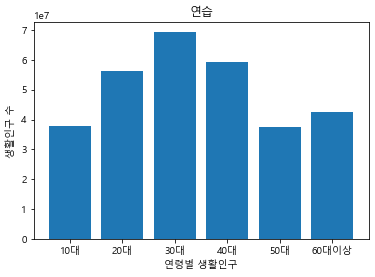

In [60]:
plt.title('연습')
plt.bar(x,value)
plt.xticks(x,xlabel)
plt.yticks(np.arange(0,80000000,step=10000000))
#plt.text(-0.1, 1, r'test')
plt.xlabel('연령별 생활인구')
plt.ylabel('생활인구 수')
plt.show()

In [69]:
x2=sp_recent.iloc[0,15:21].index
x2

Index(['시간대_1_생활인구_수', '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수',
       '시간대_5_생활인구_수', '시간대_6_생활인구_수'],
      dtype='object')

In [70]:
v1 = y['시간대_1_생활인구_수'].sum()
v2 = y['시간대_2_생활인구_수'].sum()
v3 = y['시간대_3_생활인구_수'].sum()
v4 = y['시간대_4_생활인구_수'].sum()
v5 = y['시간대_5_생활인구_수'].sum()
v6 = y['시간대_6_생활인구_수'].sum()

value2=[v1,v2,v3,v4,v5,v6]
value2
xlabel2=['00~06시', '06~11시', '11~14시', '14~17시',
       '17~21시', '21~24시']


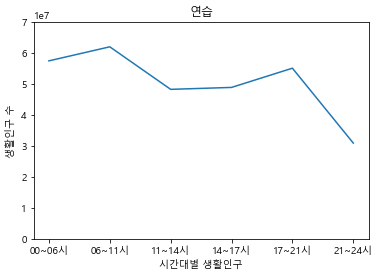

In [72]:
plt.title('연습')
plt.plot(x2,value2)
plt.xticks(x2,xlabel2)
plt.yticks(np.arange(0,80000000,step=10000000))
#plt.text(-0.1, 1, r'test')
plt.xlabel('시간대별 생활인구')
plt.ylabel('생활인구 수')
plt.show()

In [73]:
x1=sp_recent.iloc[0,21:28].index
x1

Index(['월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수',
       '토요일_생활인구_수', '일요일_생활인구_수'],
      dtype='object')

In [74]:
c1 = y['월요일_생활인구_수'].sum()
c2 = y['화요일_생활인구_수'].sum()
c3 = y['수요일_생활인구_수'].sum()
c4 = y['목요일_생활인구_수'].sum()
c5 = y['금요일_생활인구_수'].sum()
c6 = y['토요일_생활인구_수'].sum()
c7 = y['일요일_생활인구_수'].sum()

value1=[c1,c2,c3,c4,c5,c6,c7]
value1
xlabel1=['월요일', '화요일', '수요일', '목요일',
       '금요일', '토요일', '일요일']

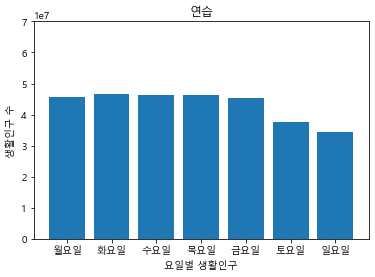

In [75]:
plt.title('연습')
plt.bar(x1,value1)
plt.xticks(x1,xlabel1)
plt.yticks(np.arange(0,80000000,step=10000000))
#plt.text(-0.1, 1, r'test')
plt.xlabel('요일별 생활인구')
plt.ylabel('생활인구 수')
plt.show()

In [76]:
c1 = y['월요일_생활인구_수'].sum()

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,시군구_명,엑스좌표_값,와이좌표_값
0,2021,3,U,관광특구,1001496,강남 마이스 관광특구,84144,42839,41306,5308,...,12423,13019,13178,13992,13701,9591,8244,강남구,205310,445727
1,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,47931,47982,5297,...,14551,15070,14804,15586,15381,11155,9367,강남구,205310,445727
2,2021,1,U,관광특구,1001496,강남 마이스 관광특구,88025,44225,43800,5063,...,13456,14127,14243,14019,13307,10139,8735,강남구,205310,445727
3,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,46313,44523,4351,...,14166,14782,15082,14512,13934,10092,8270,강남구,205310,445727
651,2021,3,R,전통시장,1001475,강남개포시장,44227,20348,23878,9905,...,6208,6229,6404,6423,6605,6410,5947,강남구,206065,443310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769,2020,4,A,골목상권,1000887,강남대로136길,330041,165145,164895,21827,...,51777,52742,52684,50158,48232,39224,35225,강남구,202160,445961
18797,2021,3,A,골목상권,1000886,강남대로118길,449022,211963,237059,35206,...,64185,63093,64569,65064,64387,64005,63720,강남구,202485,445404
18798,2021,2,A,골목상권,1000886,강남대로118길,483666,223433,260233,39676,...,69555,69534,69795,69030,69534,68522,67695,강남구,202485,445404
18799,2021,1,A,골목상권,1000886,강남대로118길,501153,235504,265648,40071,...,72621,72140,71785,72222,70612,70652,71123,강남구,202485,445404
